<a href="https://colab.research.google.com/github/AshleyMendez4/COVID-NineTeam/blob/main/USA_Real_Estate_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real Estate Analysis in the USA**


---
---

House prices change over time, and it can be difficult to predict when and where to buy a house. There is a dataset on Real Estate in the USA as of 2021. It has information that tells us if the house is for sale or not, the price, the number of beds, baths, the acre lot, the full address that contains the street, city, state, and zip code, the house size, and lastly, the sold date. Does location affect house prices to rise? What attributes of a house make a huge difference in house prices? I plan to find a correlation between the states and prices to analyze which area contains higher house prices. I also plan to investigate the attributes of a house and see if that can make a difference in house prices. This analysis should help people understand what to look for when determining whether to buy a home in the USA.

---
---

# Steps to analyze data

1) Description of Realtor dataset

2) Review and clean data from any unclear data

3) Analyze data for any correlations between price and other attributes of a house

4) Plots to display results


# Step 1) Description of Realtor dataset

Retrieved dataset from Kaggle


---


https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset 

The dataset contains the status, price, number of beds, number of baths, acre lot, full address, street, city, state, zip code, house size, and sold date

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/'Colab Notebooks'

Mounted at /content/gdrive/
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CSV/realtor-data.csv')
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


Verify the number of columns and rows in the dataset

In [ ]:
df.shape

(146346, 12)

# Step 2) Review and clean data from any unclear data
## Clean Data

Originally there were 146,346 records. If there are null values then my strategy is to drop the null values. After the null values were removed the dataset dropped to 38,309 records. Then we want to remove any duplicates which dropped the dataset to 5,647 records.

In [ ]:
df.isnull().sum()

status              0
price               0
bed             27729
bath            27541
acre_lot        30302
full_address        1
street             86
city               53
state               1
zip_code          196
house_size      27152
sold_date       96227
dtype: int64

Drop all null values 

In [ ]:
df = df.dropna()
df

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
829,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
3380,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
5083,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
5387,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
9053,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
...,...,...,...,...,...,...,...,...,...,...,...,...
146325,for_sale,1085000.0,6.0,3.0,0.07,"11 Mount Cushing Ter, Boston, MA, 02125",11 Mount Cushing Ter,Boston,Massachusetts,2125.0,3008.0,2000-05-01
146326,for_sale,798000.0,4.0,2.0,0.04,"29 Mount Pleasant St, Somerville, MA, 02145",29 Mount Pleasant St,Somerville,Massachusetts,2145.0,1319.0,1996-11-01
146327,for_sale,699000.0,4.0,2.0,0.03,"76 Franklin St, Somerville, MA, 02145",76 Franklin St,Somerville,Massachusetts,2145.0,1192.0,2004-10-15
146335,for_sale,575000.0,1.0,2.0,17.48,"250 Hammond Pond Pkwy Apt 1107S, Newton, MA, 0...",250 Hammond Pond Pkwy Apt 1107S,Newton,Massachusetts,2467.0,899.0,2004-01-20


Nulls are removed and verified that there are none in the columns

In [ ]:
df.isnull().sum()

status          0
price           0
bed             0
bath            0
acre_lot        0
full_address    0
street          0
city            0
state           0
zip_code        0
house_size      0
sold_date       0
dtype: int64

Checks to see if there are any duplicates and if there are then they are removed

In [ ]:
df.duplicated().any()

True

In [ ]:
df.drop_duplicates(subset= 'full_address', keep='first', inplace=True)

In [ ]:
df.duplicated().any()

False

In [ ]:
df.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
dtype: object

In [ ]:
df

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
829,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
10344,for_sale,950000.0,5.0,4.0,0.99,"46 Water Isle, Saint Thomas, VI, 00802",46 Water Isle,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
10351,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
24237,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
24238,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
138035,for_sale,499900.0,3.0,1.0,0.46,"526 Randolph St, Abington, MA, 02351",526 Randolph St,Abington,Massachusetts,2351.0,1963.0,2001-04-02
138049,for_sale,359900.0,3.0,1.0,0.19,"19 Auburn St, Brockton, MA, 02302",19 Auburn St,Brockton,Massachusetts,2302.0,1084.0,2003-11-14
138085,for_sale,599900.0,3.0,2.0,0.47,"134 Summit Rd, Abington, MA, 02351",134 Summit Rd,Abington,Massachusetts,2351.0,2148.0,1995-02-21
138171,for_sale,650000.0,5.0,3.0,0.56,"783 Hancock St, Abington, MA, 02351",783 Hancock St,Abington,Massachusetts,2351.0,2454.0,1978-11-16


# Step 3) Analyze data for any correlations between price and other attributes of a house
## Result 1: House sales are the highest in Massachusetts and lowest in Puerto Rico


---



The histogram below shows the states that have at least one house that is for sale. There are a few states such as Tennessee and South Carolina that are not shown due to the cleaning process and have been removed. In this plot, the most houses for sale are in Massachusetts whereas in Puerto Rico has one listed.

Text(0, 0.5, 'Total Houses')

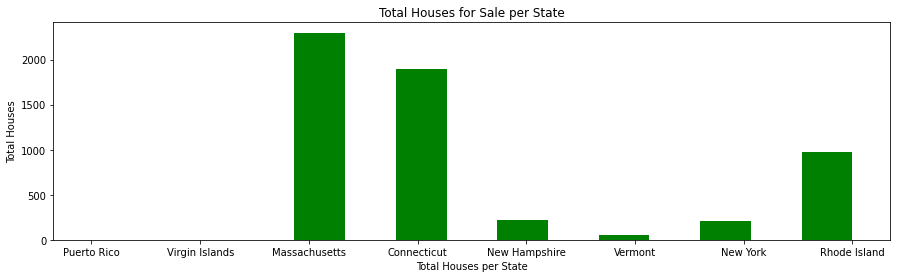

In [ ]:
plt.figure(figsize=(15,4))
plt.hist(df['state'], bins=15, color='#008000', rwidth=1)
plt.title('Total Houses for Sale per State')
plt.xlabel('Total Houses per State')
plt.ylabel('Total Houses')

##Result 2: Common price for a house range 200,000 - 400,000 dollars
The histogram below represents the price ranges for the houses in the dataset. The price ranges from 0 to 1,000,000 dollars. A common price for a house tend to range around 200,000 and 400,000 dollars. After that, the prices drop meaning fewer houses in all of the states combined have that common price.

Text(0, 0.5, 'Total Houses')

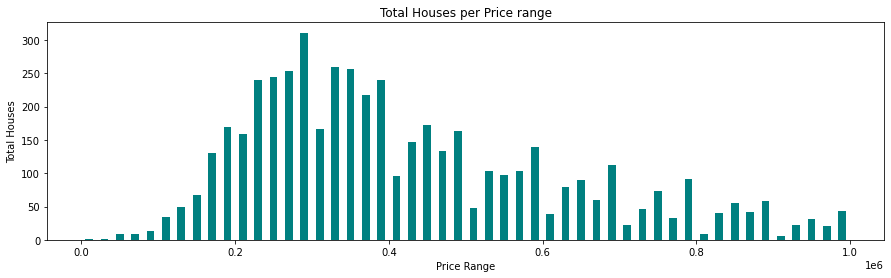

In [ ]:
plt.figure(figsize=(15,4))
plt.hist(df['price'], range = (0, 1000000), bins = 50, color='#008080', rwidth=.5)
plt.title('Total Houses per Price range')
plt.xlabel('Price Range')
plt.ylabel('Total Houses')

##Result 3: More than 350 houses have a common house size of square feet greater than 1000
The histogram below represents the house size range from 0 to 5,000 square feet. More than 350 houses have a common house size of close to and more than 1000 square feet. Total houses with a common house size of 2000 square feet and greater are less common and drop as the house size grows. 

Text(0, 0.5, 'Total Houses')

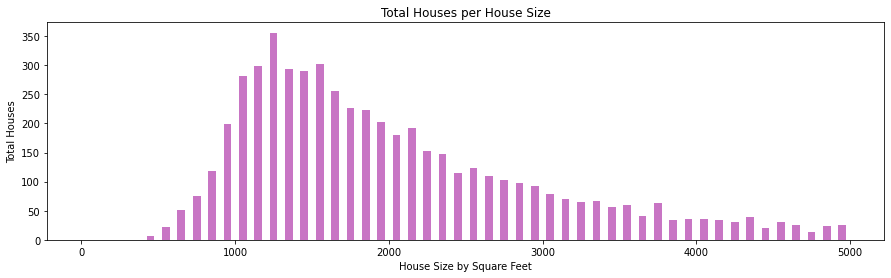

In [ ]:
plt.figure(figsize=(15,4))
plt.hist(df['house_size'], range = (0, 5000), bins = 50, color='#C875C4', rwidth=.5)
plt.title('Total Houses per House Size')
plt.xlabel('House Size by Square Feet')
plt.ylabel('Total Houses')

Subplots of the three histograms above

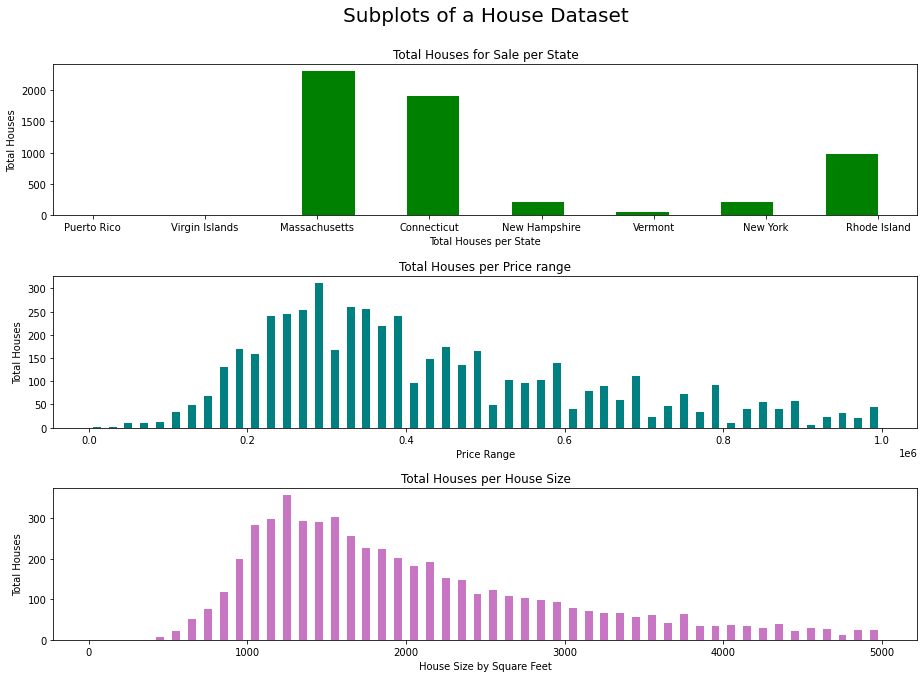

In [ ]:
f, (bar1, bar2, bar3) = plt.subplots(3, figsize=(15, 10))
f.suptitle("Subplots of a House Dataset", fontsize=20)
f.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

bar1.hist(df['state'], bins=15, color='#008000', rwidth=1)
bar1.set_title('Total Houses for Sale per State')
bar1.set_xlabel('Total Houses per State')
bar1.set_ylabel('Total Houses')

bar2.hist(df['price'], range = (0, 1000000), bins = 50, color='#008080', rwidth=.5)
bar2.set_title('Total Houses per Price range')
bar2.set_xlabel('Price Range')
bar2.set_ylabel('Total Houses')

bar3.hist(df['house_size'], range = (0, 5000), bins = 50, color='#C875C4', rwidth=.5)
bar3.set_title('Total Houses per House Size')
bar3.set_xlabel('House Size by Square Feet')
bar3.set_ylabel('Total Houses')

plt.show()

##Result 4: Virgin Islands has the highest average price and Puerto Rico has the lowest
Line plot below represents the relationship between the average price per State. The State Puerto Rico has the lowest average price of houses whereas Virgin Islands has the highest average price for a house on sale. 

Text(0, 0.5, 'Average Price')

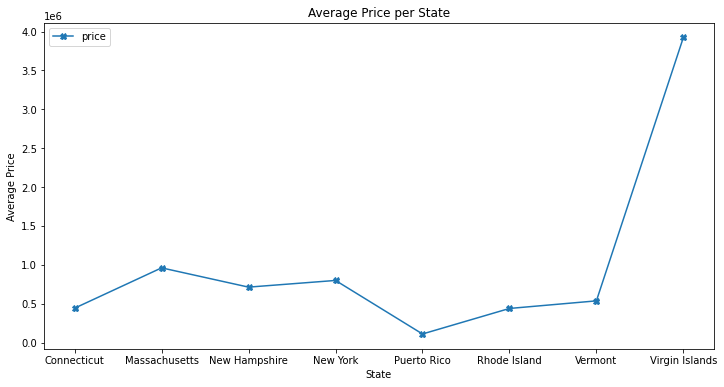

In [ ]:
rel = df.groupby(['state']).agg({'price': 'mean'})
line = rel[:]
line.plot(marker = 'X', figsize = (12, 6))

plt.title('Average Price per State')
plt.xlabel('State')
plt.ylabel('Average Price')

##Result 5: If houses have less than 5 beds or baths they have the same price point
Graph below is a multi-line graph representing the relationship between bed and baths from average prices. The plot shows that if there are 10 baths then the average price is high whereas 10 beds the average price is low. 

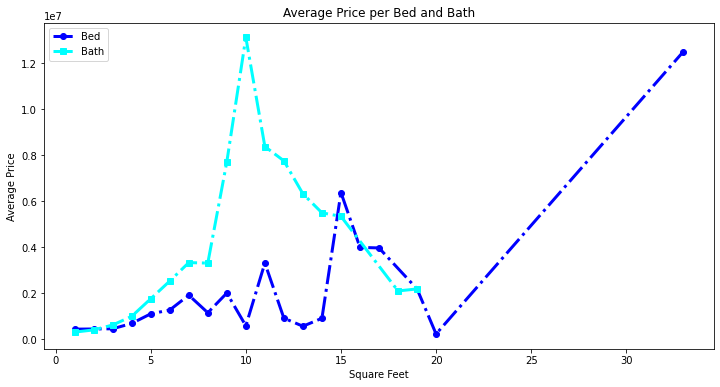

In [ ]:
avg_bed = df.groupby(['bed']).agg({'price': 'mean'})
avg_bath = df.groupby(['bath']).agg({'price': 'mean'})

plt.figure(figsize=(12,6))
plt.plot(avg_bed, color = '#0000ff', label = "Bed", marker = 'o', linestyle = 'dashdot', linewidth = 3)
plt.plot(avg_bath, color = '#00ffff', label = "Bath", marker = 's', linestyle = 'dashdot', linewidth = 3)
plt.title('Average Price per Bed and Bath')
plt.xlabel('Square Feet')
plt.ylabel('Average Price')
plt.legend()
plt.show()

##Result 6: Virgin Islands has an average price above $1,000,000
Bar plot below represents the average price per State. Virgin Islands is shown to have the highest average price meanwhile Puerto Rico has the lowest average price for a house.

(0.0, 1000000.0)

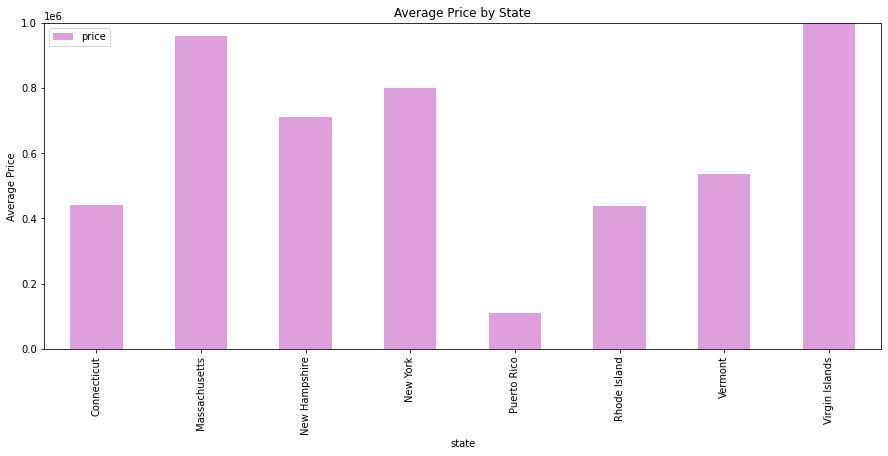

In [ ]:
avg_pricebyState = df.groupby(['state']).agg({'price': 'mean'})

avg_pricebyState.plot.bar(color = '#dda0dd', figsize=(15, 6))
plt.title('Average Price by State')
plt.ylabel('Average Price')
plt.ylim(0, 1000000)

##Result 7: Common price average under $500,000
Bar graph demonstrating the price averages frequency

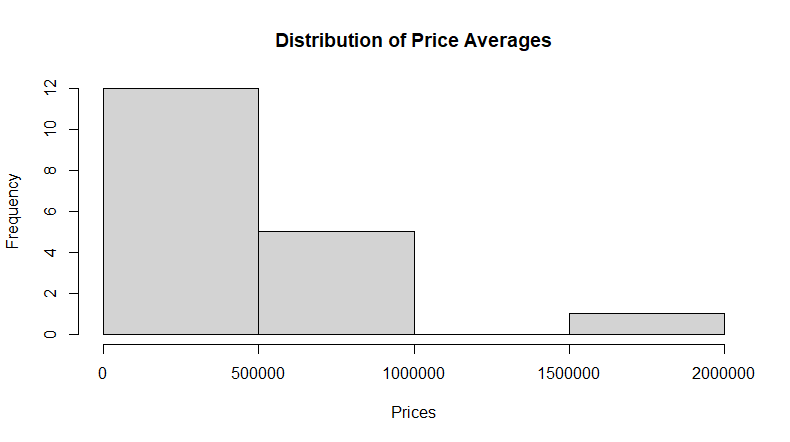



##Result 8: New York has a high average price and South Carolina has the lowest
Pie graph demonstrating average prices at each State

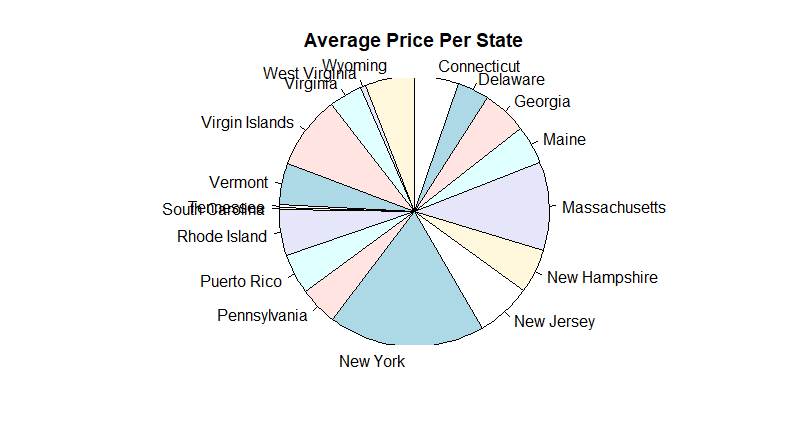

##Result 9: New York has the highest average price and average acre lot of 11.70
Displays 18 states in the USA. Each bubble represents the average price for that state plus the average acre lot.

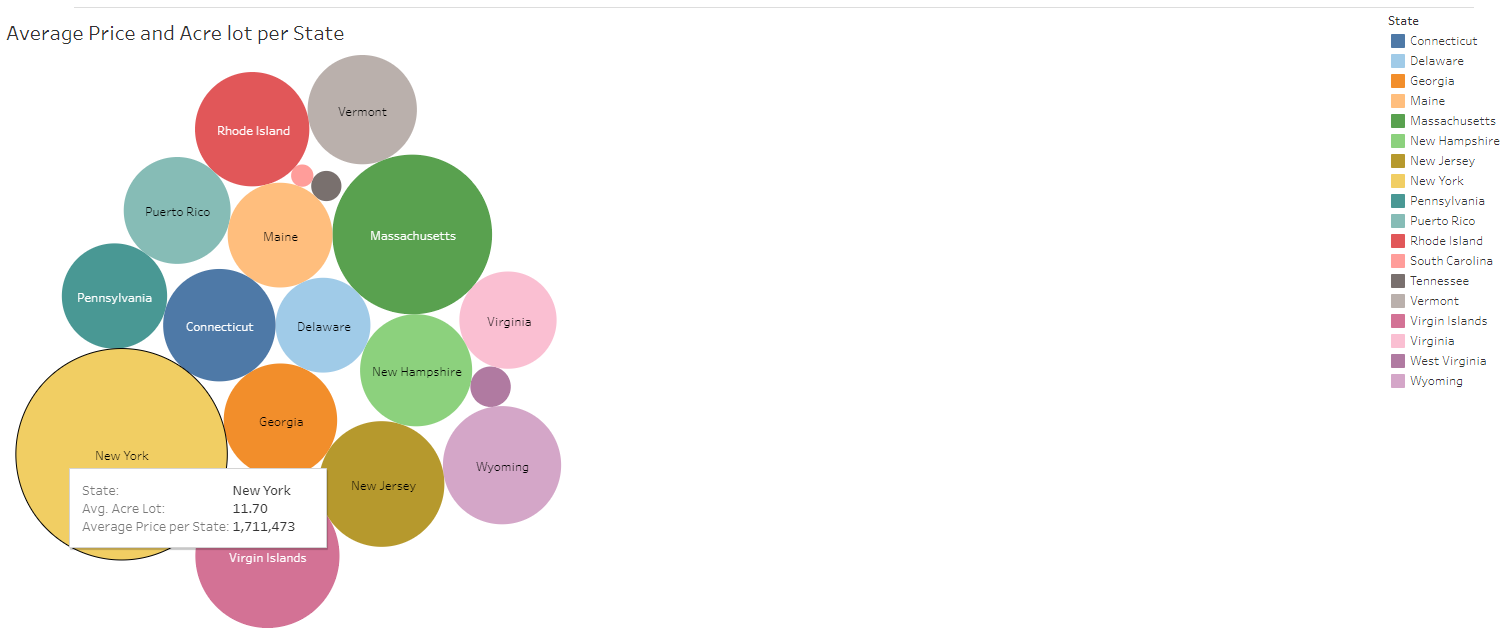

https://public.tableau.com/app/profile/ashley.mendez/viz/USARealEstate_16631804297840/Sheet1 

## Result 10: New York has the highest average price and Georgia has the highest number of Beds.
Bar graph demonstrating average price and bed per State. Seems to show no correlation between the two attributes.

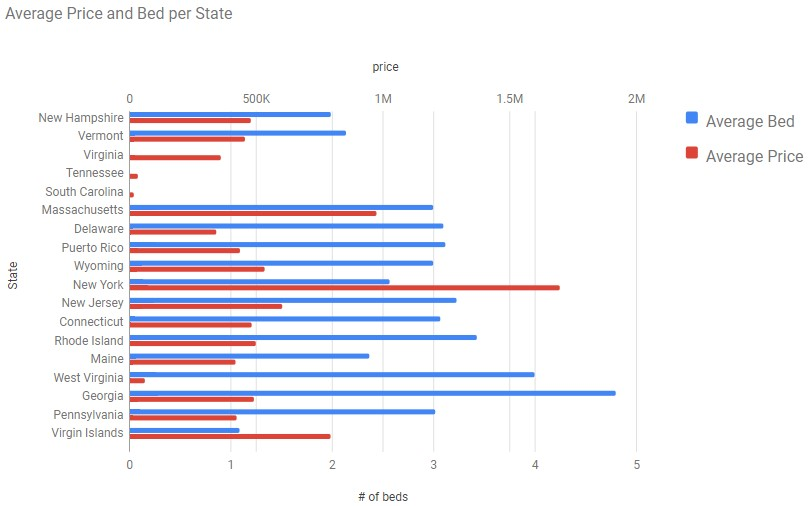

# Hierarchical Indexing

---
## Indexing State and City to the dataframe
Arranged the dataset by creating an index by State then by the cities

In [ ]:
sec_df = pd.DataFrame(df)
hi = sec_df.set_index(['state', 'city'])
hi

status      price  bed  bath  acre_lot  \
state          city                                                     
Puerto Rico    Dorado        for_sale   110000.0  7.0   3.0      0.09   
Virgin Islands Saint Thomas  for_sale   950000.0  5.0   4.0      0.99   
               Saint Thomas  for_sale  6899000.0  4.0   6.0      0.83   
Massachusetts  Agawam        for_sale   525000.0  3.0   3.0      0.45   
               Agawam        for_sale   289900.0  3.0   2.0      0.36   
...                               ...        ...  ...   ...       ...   
               Abington      for_sale   499900.0  3.0   1.0      0.46   
               Brockton      for_sale   359900.0  3.0   1.0      0.19   
               Abington      for_sale   599900.0  3.0   2.0      0.47   
               Abington      for_sale   650000.0  5.0   3.0      0.56   
               Brockton      for_sale   459900.0  3.0   2.0      0.31   

                                                        full_address  \
state          city                                                    
Puerto Rico    Dorado             B-2 Monte Elena, Dorado, PR, 00949   
Virgin Islands Saint Thomas   46 Water Isle, Saint Thomas, VI, 00802   
               Saint Thomas   10 Water Isle, Saint Thomas, VI, 00802   
Massachusetts  Agawam                955 River Rd, Agawam, MA, 01001   
               Agawam        82 Harvey Johnson Dr, Agawam, MA, 01001   
...                                                              ...   
               Abington         526 Randolph St, Abington, MA, 02351   
               Brockton            19 Auburn St, Brockton, MA, 02302   
               Abington           134 Summit Rd, Abington, MA, 02351   
               Abington          783 Hancock St, Abington, MA, 02351   
               Brockton            19 Stella Rd, Brockton, MA, 02302   

                                           street  zip_code  house_size  \
state          city                                                       
Puerto Rico    Dorado             B-2 Monte Elena     949.0      1192.0   
Virgin Islands Saint Thomas         46 Water Isle     802.0      5000.0   
               Saint Thomas         10 Water Isle     802.0      4600.0   
Massachusetts  Agawam                955 River Rd    1001.0      2314.0   
               Agawam        82 Harvey Johnson Dr    1001.0      1276.0   
...                                           ...       ...         ...   
               Abington           526 Randolph St    2351.0      1963.0   
               Brockton              19 Auburn St    2302.0      1084.0   
               Abington             134 Summit Rd    2351.0      2148.0   
               Abington            783 Hancock St    2351.0      2454.0   
               Brockton              19 Stella Rd    2302.0      1270.0   

                              sold_date  
state          city                      
Puerto Rico    Dorado        2019-06-28  
Virgin Islands Saint Thomas  2013-10-11  
               Saint Thomas  2018-04-05  
Massachusetts  Agawam        2014-06-25  
               Agawam        2012-10-12  
...                                 ...  
               Abington      2001-04-02  
               Brockton      2003-11-14  
               Abington      1995-02-21  
               Abington      1978-11-16  
               Brockton      2009-11-20  

[5647 rows x 10 columns]

Summary Statistics using sum operation with the index City

In [ ]:
sum_stat = hi.sum(level = 'city')
sum_stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


,status,price,bed,bath,acre_lot,full_address,street,zip_code,house_size,sold_date
city,,,,,,,,,,
Dorado,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,949.0,1192.0,2019-06-28
Saint Thomas,for_salefor_sale,7849000.0,9.0,10.0,1.82,"46 Water Isle, Saint Thomas, VI, 0080210 Water...",46 Water Isle10 Water Isle,1604.0,9600.0,2013-10-112018-04-05
Agawam,for_salefor_salefor_salefor_salefor_salefor_sa...,3109499.0,27.0,19.0,4.94,"955 River Rd, Agawam, MA, 0100182 Harvey Johns...",955 River Rd82 Harvey Johnson Dr45 Hampden Ln8...,8124.0,14953.0,2014-06-252012-10-121986-11-202008-09-191992-0...
Pelham,for_salefor_salefor_salefor_salefor_salefor_sa...,7307900.0,36.0,33.0,21.75,"57 Amherst Rd, Pelham, MA, 0100261 S Valley Rd...",57 Amherst Rd61 S Valley Rd188 Mammoth Rd35 Sp...,26612.0,35843.0,2005-07-251996-07-122000-06-092003-10-232007-0...
Amherst,for_salefor_salefor_salefor_salefor_salefor_sa...,10922500.0,60.0,51.0,18.53,"103 Sunset Ave, Amherst, MA, 0100212 Kettle Po...",103 Sunset Ave12 Kettle Pond Rd5 Bedford Ct Un...,31237.0,41731.0,1992-06-241993-08-112021-08-191997-06-301998-0...
...,...,...,...,...,...,...,...,...,...,...
Brockton,for_salefor_salefor_salefor_salefor_salefor_sa...,28764697.0,220.0,120.0,11.74,"22 Addison St, Brockton, MA, 02301158 Forest S...",22 Addison St158 Forest St22 Clarence St29 Cal...,133471.0,104635.0,1987-06-221997-10-171998-10-202004-09-172009-0...
Whitman,for_sale,299950.0,2.0,1.0,0.14,"28 East Ave, Whitman, MA, 02382",28 East Ave,2382.0,1275.0,1972-05-01
Raynham,for_salefor_salefor_salefor_sale,2522800.0,15.0,12.0,2.67,"854 Broadway, Raynham, MA, 02767455 N Main St,...",854 Broadway455 N Main St225 Cynthia Dr474 Kin...,11068.0,11075.0,1989-07-182001-04-272009-08-211991-11-18


Used unstack operation on the column State

In [ ]:
unstacked = hi.unstack()
unstacked.head(50)

city,Abington,Acton,Adams,Agawam,Alford,Amenia,Amesbury,Amherst,Ancram,Andover,...,Windsor Locks,Wingdale,Winthrop,Woburn,Woodbury,Woodstock,Woonsocket,Worcester,Worthington,Wrentham
state,,,,,,,,,,,,,,,,,,,,,
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229900.0,...,221000.0,NaN,NaN,NaN,599900.0,119000.0,NaN,NaN,NaN,NaN
Massachusetts,525000.0,899000.0,399900.0,525000.0,625000.0,NaN,799000.0,745000.0,NaN,835000.0,...,NaN,NaN,749900.0,1299000.0,NaN,NaN,NaN,1495000.0,2995000.0,349900.0
New Hampshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New York,NaN,NaN,NaN,NaN,NaN,372000.0,NaN,NaN,1495000.0,NaN,...,NaN,153100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rhode Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,399000.0,NaN,NaN,NaN
Vermont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Used pivot_table operation to get the same results as above that used unstack operation. Pivot operation seems to be more delicate and does not like duplicates.

In [ ]:
pivoted = df.pivot_table(index = 'state', columns = 'city', values = 'price', aggfunc = 'sum')
pivoted

city,Abington,Acton,Adams,Agawam,Alford,Amenia,Amesbury,Amherst,Ancram,Andover,...,Windsor Locks,Wingdale,Winthrop,Woburn,Woodbury,Woodstock,Woonsocket,Worcester,Worthington,Wrentham
state,,,,,,,,,,,,,,,,,,,,,
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,862900.0,...,2884100.0,NaN,NaN,NaN,4871800.0,69393100.0,NaN,NaN,NaN,NaN
Massachusetts,4494400.0,6120900.0,3003200.0,3109499.0,3769000.0,NaN,2199000.0,5954700.0,NaN,25531400.0,...,NaN,NaN,5922700.0,5562089.0,NaN,NaN,NaN,26998362.0,3745000.0,3012400.0
New Hampshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4967800.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New York,NaN,NaN,NaN,NaN,NaN,14669000.0,NaN,NaN,4340000.0,NaN,...,NaN,1188100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rhode Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21994391.0,NaN,NaN,NaN
Vermont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For each State and City the total number of prices are counted

In [ ]:
grouped = df['price'].groupby([df['state'], df['city']]).count()
grouped.unstack()

city,Abington,Acton,Adams,Agawam,Alford,Amenia,Amesbury,Amherst,Ancram,Andover,...,Windsor Locks,Wingdale,Winthrop,Woburn,Woodbury,Woodstock,Woonsocket,Worcester,Worthington,Wrentham
state,,,,,,,,,,,,,,,,,,,,,
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,12.0,NaN,NaN,NaN,6.0,23.0,NaN,NaN,NaN,NaN
Massachusetts,8.0,7.0,13.0,8.0,4.0,NaN,3.0,10.0,NaN,17.0,...,NaN,NaN,8.0,6.0,NaN,NaN,NaN,63.0,2.0,6.0
New Hampshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New York,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,3.0,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rhode Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN
Vermont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
